# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы

Шаг 1. Открыть файл с данными и изучить общую информацию
Шаг 2. Предобработка данных

Шаг 3. Посчитать и добавить в таблицу:

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Для начала импоритруем библиотеку и откроем файл.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
apartment_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [52]:
apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В файле находится большое количество столбцов. Это значит, что для корректного отображения данных мы в выводе разобъем  на две таблицы: первая с данными, вписанными пользователями, а вторая с данными получеными автоматически на основе картографических данных. Столбец <i>locality_name</i> присутствует и там, и там для наглядности.

In [53]:
apartment_data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

In [54]:
apartment_data.loc[:, :'locality_name'].head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  
0      False         25.00      NaN            Санкт-Петербург  
1      False         11.00      2.0             посёлок Шушары  
2      False          8.30      0.0            Санкт-Петербург  
3      False           NaN      0.0            Санкт-Петербург  
4      False         41.00      NaN            Санкт-Петербург  
5      False          9.10      NaN  городской посёлок Янино-1  
6      False         14.40      1.0          посёлок Парголово  
7      False         18.90      2.0            Санкт-Петербург  
8      False          8.81      NaN             посёлок Мурино  
9      False          6.50      2.0            Санкт-Петербург

In [55]:
apartment_data.loc[:, 'locality_name':].head(10)

locality_name  airports_nearest  cityCenters_nearest  \
0            Санкт-Петербург           18863.0              16028.0   
1             посёлок Шушары           12817.0              18603.0   
2            Санкт-Петербург           21741.0              13933.0   
3            Санкт-Петербург           28098.0               6800.0   
4            Санкт-Петербург           31856.0               8098.0   
5  городской посёлок Янино-1               NaN                  NaN   
6          посёлок Парголово           52996.0              19143.0   
7            Санкт-Петербург           23982.0              11634.0   
8             посёлок Мурино               NaN                  NaN   
9            Санкт-Петербург           50898.0              15008.0   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0          755.0   
1               0.0            NaN               0.0            NaN   
2               1.0           90.0               2.0          574.0   
3               2.0           84.0               3.0          234.0   
4               2.0          112.0               1.0           48.0   
5               NaN            NaN               NaN            NaN   
6               0.0            NaN               0.0            NaN   
7               0.0            NaN               0.0            NaN   
8               NaN            NaN               NaN            NaN   
9               0.0            NaN               0.0            NaN   

   days_exposition  
0              NaN  
1             81.0  
2            558.0  
3            424.0  
4            121.0  
5             55.0  
6            155.0  
7              NaN  
8            189.0  
9            289.0

Данные на первый взгляд не вызывают вопросы. Но и есть некоторые столбцы, которые хочется изучить получше.

Далее будут рассмотренны некоторые столбцы, которые вызывают подозрения.

In [56]:
apartment_data.duplicated().sum()

0

In [57]:
apartment_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [58]:
apartment_data['ceiling_height'].value_counts(dropna=False)

NaN      9195
2.50     3515
2.60     1646
2.70     1574
3.00     1112
         ... 
26.00       1
3.88        1
3.29        1
3.83        1
3.58        1
Name: ceiling_height, Length: 184, dtype: int64

In [59]:
apartment_data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [60]:
apartment_data['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [61]:
apartment_data['locality_name'].value_counts(dropna=False).head(15)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Name: locality_name, dtype: int64

### Вывод

У нас есть таблица объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов.

Предоставленная информация не идеальна, однако не требует координальных переработок. Основная проблема - это данные, заполненные машиной. Большое количество пропусков, которое может быть вызвано ограничениями по растоянию до объекта. Если, допустим парк, не входит в определенный диапазон, то и в таблицу ничего не попадет. Вероятно, это было сделанно для того, чтобы не было поиска аэропорта по все России, а это сильно загрузило бы систему.

С людьми все просто. В некоорых местах люди просто забывали (или не хотели) заполнять информацию. К примеру в столбце <i>is_apartment</i> много пропусков. 

Прежде, чем перейти к исследованиям, требуется предобработать данные.

### Шаг 2. Предобработка данных

В таблице присутствуют некорректные названия столбцов. В первую очередь нужно переиминовать их.

In [62]:
apartment_data.columns=[
    'total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 
    'floors_total', 'living_area', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 
    'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest', 'parks_around_3_km',
    'parks_nearest', 'ponds_around_3_km', 'ponds_nearest', 'days_exposition']
apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
is_studio               23699 non-null bool
is_open_plan            23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3_km       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_3_

К столбцам с булевыми переменными было добавленно 'is_' и вместо '...3000' было написанно '...\_3\_km' для наглядности. Также было переименован столбец с расстоянием до центра города.

Столбцу <i>last_price</i> больше подойдет тип int64. То же самое можно сказать о <i>balcony, floors_total, airports_nearest, city_centers_nearest, parks_around_3_km, parks_nearest, ponds_around_3_km, ponds_nearest</i> и <i>days_exposition</i>. Однако в них находятся NaN значения, и просто перевести в int не выйдет. Проблем еще добавляет то, что не во всех стобцах можно однозначно заменить пропуски. Просто удалить пропуски или заменить их медианой, в большенстве случаев, нельзя. Ниже будут заполненны некоторые пропуски там, где это допустимо. 

In [63]:
apartment_data['last_price'] = apartment_data['last_price'].astype('int')

apartment_data['last_price'].dtype

dtype('int64')

<i>balcony</i> является исключением, и мы можем заменить пропуски на 0, так как логично предположить, что если человек не указал число балконов то у него их нет.

In [64]:
apartment_data['balcony'] = apartment_data['balcony'].fillna(0).astype('int')

apartment_data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64


Столбец <i>is_apartment</i> должен быть булевого типа, однако таким не является. Это связанно с тем, что в нем присутствуют NaN значения. NaN мы можем заменить на False по причине малого числа апартаментов на рынке. Также причиной может быть низкий спрос на них. Я думаю, что раз человек не указал ничего в графе апартаменты, значит его недвижимость не является апартаментами.

Мою гипотизу подтверждает фильтр в Яндекс Недвижимость - апартаментов сейчас на рынке меньше 5%.

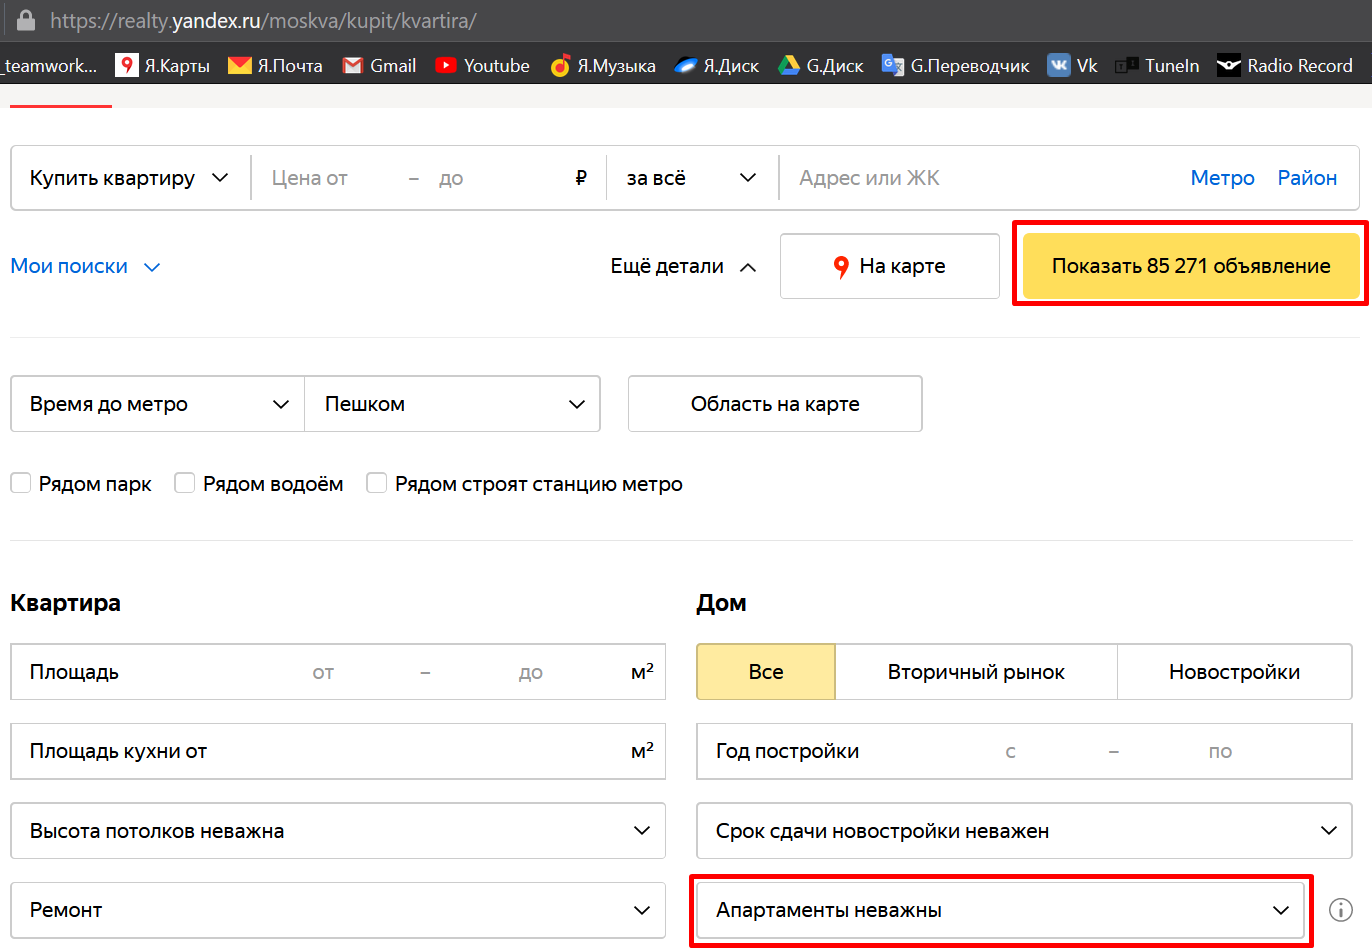

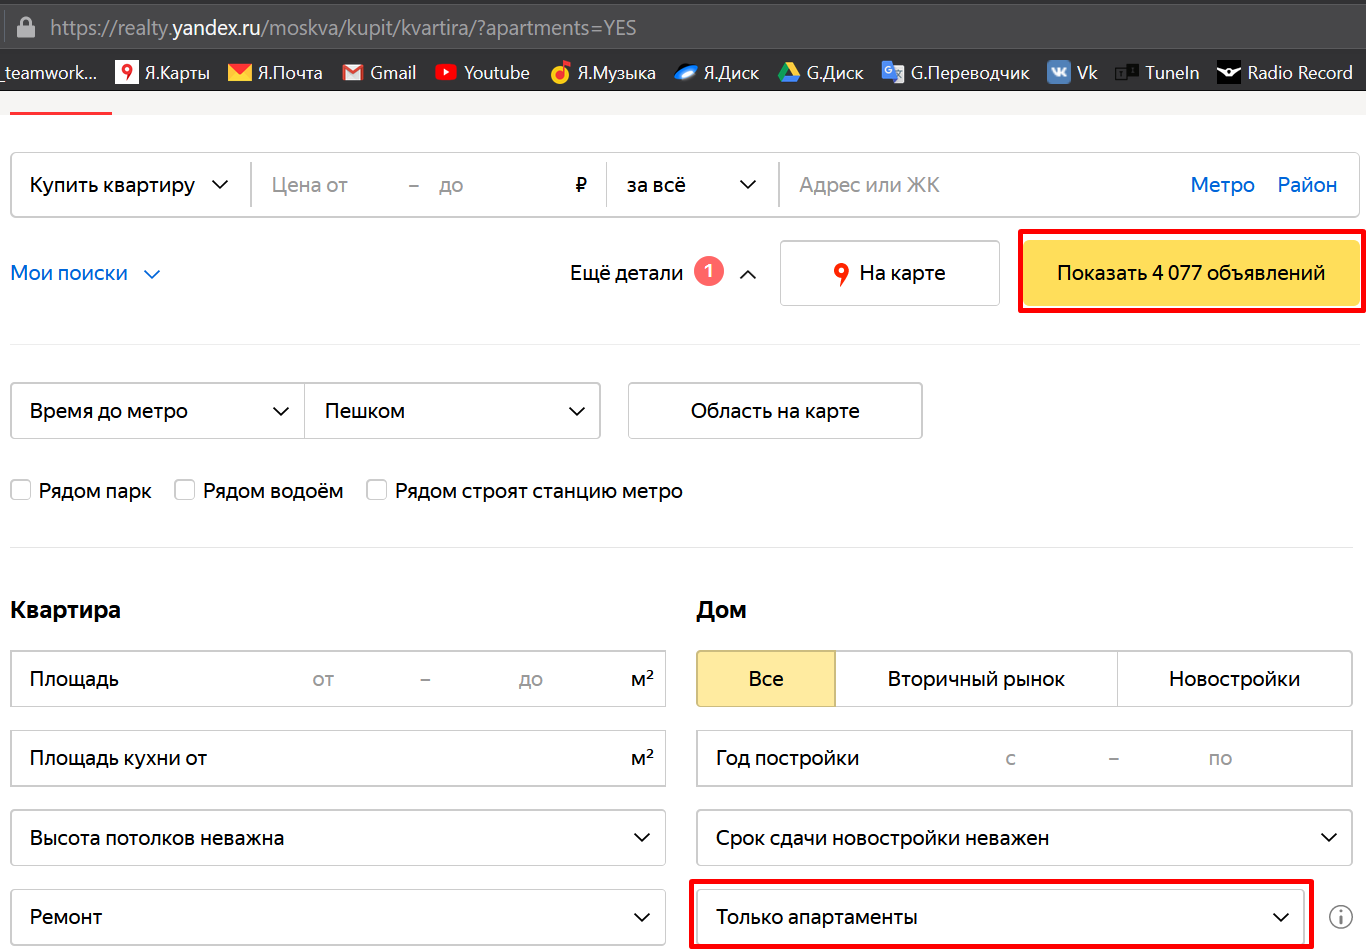

In [65]:
apartment_data['is_apartment'] = apartment_data['is_apartment'].fillna(False).astype('bool')
apartment_data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Также в таблице присутствует столбец с датой, который имеет тип данных object. Нужно это исправить.

In [66]:
apartment_data['first_day_exposition'] = pd.to_datetime(apartment_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
apartment_data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8         False  ...   
1             NaN          11.0         18.6      1         False  ...   
2             NaN           5.0         34.3      4         False  ...   
3             NaN          14.0          NaN      9         False  ...   
4            3.03          14.0         32.0     13         False  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург           18863.0   
1          11.0        2   посёлок Шушары           12817.0   
2           8.3        0  Санкт-Петербург           21741.0   
3           NaN        0  Санкт-Петербург           28098.0   
4          41.0        0  Санкт-Петербург           31856.0   

  city_centers_nearest  parks_around_3_km  parks_nearest  ponds_around_3_km  \
0              16028.0                1.0          482.0                2.0   
1              18603.0                0.0            NaN                0.0   
2              13933.0                1.0           90.0                2.0   
3               6800.0                2.0           84.0                3.0   
4               8098.0                2.0          112.0                1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [67]:
apartment_data.isnull().sum()[['first_day_exposition']]

first_day_exposition    0
dtype: int64

Я предлагаю удалить данные с отсутсвующим городом, по причине того, что это могут оказаться дома вообще не в нашем поле деятельности. В них нет уверенности. Они могут исказить результат.

In [68]:
apartment_data = apartment_data.dropna(subset=['locality_name'])

In [69]:
apartment_data.isnull().sum()[['locality_name']]

locality_name    0
dtype: int64

Чтобы заполнить пропуски в данных о площади кухни и площади жилого помещения, мы посчитаем среднее отношение их площади ко всей площади квартиры. Этот коэффициент будет показывать какую часть от квартиры эти помещения занимают. Умножим его на площадь тех столбцов, где есть пропуски и получим примерные площади жилого помещения и кухни соответственно.

In [70]:
# Я написал для этого цикл и не стал засорять лишними переменными
for area in ['living_area', 'kitchen_area']:
    apartment_data[area] = (
    apartment_data[area]
     .fillna((apartment_data[area] / apartment_data['total_area']).median() * apartment_data['total_area']))

In [71]:
apartment_data.isnull().sum()[['living_area', 'kitchen_area']]

living_area     0
kitchen_area    0
dtype: int64

In [72]:
apartment_data.isnull().sum().sort_values(ascending=False)

parks_nearest           15586
ponds_nearest           14565
ceiling_height           9160
airports_nearest         5534
city_centers_nearest     5511
ponds_around_3_km        5510
parks_around_3_km        5510
days_exposition          3180
floors_total               85
living_area                 0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
is_studio                   0
floor                       0
is_apartment                0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
total_images                0
dtype: int64

Для парков и прудов на расстоянии 3 км все просто - если NaN и в растоянии до 3-х км их нет, то их там и нет (0). Если на расстоянии в 3 км они присутствуют, то присвоим им значение в 1.

In [73]:
def place_around(values):
    place = values[0]
    nearest = values[1]
    if pd.isna(place):
        if (nearest > 3000) | pd.isna(nearest):
            return 0
        else:
            return 1
    else:
        return place

apartment_data['parks_around_3_km'] = (
    apartment_data[['parks_around_3_km', 'parks_nearest']]
    .apply(place_around, axis=1)
    .astype('int'))

apartment_data['ponds_around_3_km'] = (
    apartment_data[['ponds_around_3_km', 'ponds_nearest']]
    .apply(place_around, axis=1)
    .astype('int'))

In [74]:
apartment_data.isnull().sum().sort_values(ascending=False)

parks_nearest           15586
ponds_nearest           14565
ceiling_height           9160
airports_nearest         5534
city_centers_nearest     5511
days_exposition          3180
floors_total               85
floor                       0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
living_area                 0
is_studio                   0
is_apartment                0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
parks_around_3_km           0
ponds_around_3_km           0
total_images                0
dtype: int64

In [75]:
apartment_data.head(20)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000      108.00           2019-03-07      3   
1              7     3350000       40.40           2018-12-04      1   
2             10     5196000       56.00           2015-08-20      2   
3              0    64900000      159.00           2015-07-24      3   
4              2    10000000      100.00           2018-06-19      2   
5             10     2890000       30.40           2018-09-10      1   
6              6     3700000       37.30           2017-11-02      1   
7              5     7915000       71.60           2019-04-18      2   
8             20     2900000       33.16           2018-05-23      1   
9             18     5400000       61.00           2017-02-26      3   
10             5     5050000       39.60           2017-11-16      1   
11             9     3300000       44.00           2018-08-27      2   
12            10     3890000       54.00           2016-06-30      2   
13            20     3550000       42.80           2017-07-01      2   
14             1     4400000       36.00           2016-06-23      1   
15            16     4650000       39.00           2017-11-18      1   
16            11     6700000       82.00           2017-11-23      3   
17             6     4180000       36.00           2016-09-09      1   
18             8     3250000       31.00           2017-01-27      1   
19            16    14200000      121.00           2019-01-09      3   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70          16.0    51.000000      8         False  ...   
1              NaN          11.0    18.600000      1         False  ...   
2              NaN           5.0    34.300000      4         False  ...   
3              NaN          14.0    90.289724      9         False  ...   
4             3.03          14.0    32.000000     13         False  ...   
5              NaN          12.0    14.400000      5         False  ...   
6              NaN          26.0    10.600000      6         False  ...   
7              NaN          24.0    40.658769     22         False  ...   
8              NaN          27.0    15.430000     26         False  ...   
9             2.50           9.0    43.600000      7         False  ...   
10            2.67          12.0    20.300000      3         False  ...   
11             NaN           5.0    31.000000      4         False  ...   
12             NaN           5.0    30.000000      5         False  ...   
13            2.56           5.0    27.000000      5         False  ...   
14             NaN           6.0    17.000000      1         False  ...   
15             NaN          14.0    20.500000      5         False  ...   
16            3.05           5.0    55.600000      1         False  ...   
17             NaN          17.0    16.500000      7         False  ...   
18            2.50           5.0    19.400000      2         False  ...   
19            2.75          16.0    76.000000      8         False  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0      25.000000        0            Санкт-Петербург           18863.0   
1      11.000000        2             посёлок Шушары           12817.0   
2       8.300000        0            Санкт-Петербург           21741.0   
3      27.413793        0            Санкт-Петербург           28098.0   
4      41.000000        0            Санкт-Петербург           31856.0   
5       9.100000        0  городской посёлок Янино-1               NaN   
6      14.400000        1          посёлок Парголово           52996.0   
7      18.900000        2            Санкт-Петербург           23982.0   
8       8.810000        0             посёлок Мурино               NaN   
9       6.500000        2            Санкт-Петербург           50898.0   
10      8.500000        0            Санкт-Петербург           38357.0   
11      6.000000        1  

In [76]:
apartment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
is_studio               23650 non-null bool
is_open_plan            23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
city_centers_nearest    18139 non-null float64
parks_around_3_km       23650 non-null int64
parks_nearest           8064 non-null float64
ponds_around_3

In [77]:
apartment_data[['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']].max()

airports_nearest        84869.0
city_centers_nearest    65968.0
parks_nearest            3190.0
ponds_nearest            1344.0
dtype: float64

### Вывод

Пропуски в данных о площади кухни и площади жилого помещения были заполненны. Также я запонил все пропуски в столбцах с парками и прудами на расстоянии 3 км.

Я решил не заполнять значения, которые были добавлены системой. Могу только предположить, что этих данных в таблице нет, так как есть на сайте ограничения на дальность. Например, если аэропорт дальше, чем 85 км, то в таблице он не указывается. Подобная картина с другими значениями.

### Шаг 3. Посчитайте и добавьте в таблицу

Мы разделим <i>last_price</i> на <i>total_area</i> и запишем результат в столбец <i>price_per_m</i>.

In [78]:
apartment_data['price_per_m'] = apartment_data['last_price'] / apartment_data['total_area']
apartment_data[['last_price', 'total_area', 'price_per_m']].head(10)

last_price  total_area    price_per_m
0    13000000      108.00  120370.370370
1     3350000       40.40   82920.792079
2     5196000       56.00   92785.714286
3    64900000      159.00  408176.100629
4    10000000      100.00  100000.000000
5     2890000       30.40   95065.789474
6     3700000       37.30   99195.710456
7     7915000       71.60  110544.692737
8     2900000       33.16   87454.764777
9     5400000       61.00   88524.590164

Теперь приступим к расчету дня недели, месяца и года публикации объявления.

In [79]:
apartment_data['week_day'] = apartment_data['first_day_exposition'].dt.weekday
apartment_data['month'] = apartment_data['first_day_exposition'].dt.month
apartment_data['year'] = apartment_data['first_day_exposition'].dt.year
apartment_data[['first_day_exposition', 'week_day', 'month', 'year']] .head()

first_day_exposition  week_day  month  year
0           2019-03-07         3      3  2019
1           2018-12-04         1     12  2018
2           2015-08-20         3      8  2015
3           2015-07-24         4      7  2015
4           2018-06-19         1      6  2018

Здесь понедельник - 0, а воскресенье - 6.

Далее классифицируем квартиры по этажам. Нас интересуют последний и первый.

In [80]:
#Функция, выполняющая классификацию этажей
def floor_classification(floors):  
    floor = floors[0] #столбец floor
    floors_total = floors[1] #столбец floors_total
    if floor == 1:
        #если нужно вывести несколько значений, используется конструкция ниже
        return pd.Series(('первый',0))
    if (floor == floors_total) & (floor !=1):
        return pd.Series(('последний',1))
    else:
        return pd.Series(('другой',2))

#применение функции floor_classification()    
apartment_data[['classificated_floor', 'classificated_floor_num']] = (
    apartment_data[['floor','floors_total']]
    .apply(floor_classification, axis=1)) #axis=1 - применяем функцию для строк
apartment_data[['floor','floors_total', 'classificated_floor', 'classificated_floor_num']].head(5)

floor  floors_total classificated_floor  classificated_floor_num
0      8          16.0              другой                        2
1      1          11.0              первый                        0
2      4           5.0              другой                        2
3      9          14.0              другой                        2
4     13          14.0              другой                        2

    0 - первый этаж
    1 - последний этаж
    2 - другие этажи

In [81]:
apartment_data['classificated_floor'].value_counts(dropna=False)

другой       17408
последний     3330
первый        2912
Name: classificated_floor, dtype: int64

Последним пунктом нужно найти соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [82]:
#функция считает соотношение жилой и общей площади и отношение площади кухни к общей
def ratio(columns):
    total_area = columns[0] #столбец total_area
    living_area = columns[1] #столбец living_area
    kitchen_area = columns[2] #столбец kitchen_area
    ratio_living_to_total= living_area / total_area
    ratio_kitchen_to_total = kitchen_area / total_area
    #если нужно вывести несколько значений, используется конструкция ниже
    return pd.Series((ratio_living_to_total, ratio_kitchen_to_total)) 

#применение функции ratio()
apartment_data[['ratio_living_to_total','ratio_kitchen_to_total']] = (
    apartment_data[['total_area', 'living_area', 'kitchen_area']]
    .apply(ratio, axis=1))
apartment_data[['total_area', 'living_area', 'kitchen_area', 'ratio_living_to_total', 'ratio_kitchen_to_total']].head(10)

total_area  living_area  kitchen_area  ratio_living_to_total  \
0      108.00    51.000000     25.000000               0.472222   
1       40.40    18.600000     11.000000               0.460396   
2       56.00    34.300000      8.300000               0.612500   
3      159.00    90.289724     27.413793               0.567860   
4      100.00    32.000000     41.000000               0.320000   
5       30.40    14.400000      9.100000               0.473684   
6       37.30    10.600000     14.400000               0.284182   
7       71.60    40.658769     18.900000               0.567860   
8       33.16    15.430000      8.810000               0.465320   
9       61.00    43.600000      6.500000               0.714754   

   ratio_kitchen_to_total  
0                0.231481  
1                0.272277  
2                0.148214  
3                0.172414  
4                0.410000  
5                0.299342  
6                0.386059  
7                0.263966  
8                0.265682  
9                0.106557

### Вывод

Были проведены расчеты всех требуемых в условии значений и добавлены в таблицу.

In [83]:
apartment_data[['price_per_m','week_day', 'month', 'year', 'classificated_floor', 'ratio_living_to_total', 'ratio_kitchen_to_total']].head(1)

price_per_m  week_day  month  year classificated_floor  \
0  120370.37037         3      3  2019              другой   

   ratio_living_to_total  ratio_kitchen_to_total  
0               0.472222                0.231481

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

(можно создать цикл, который будет чертить графики, но тогда в jupyter неудобно описывать каждый отдельно)

Воспользуемся методом <code>plot()</code>.


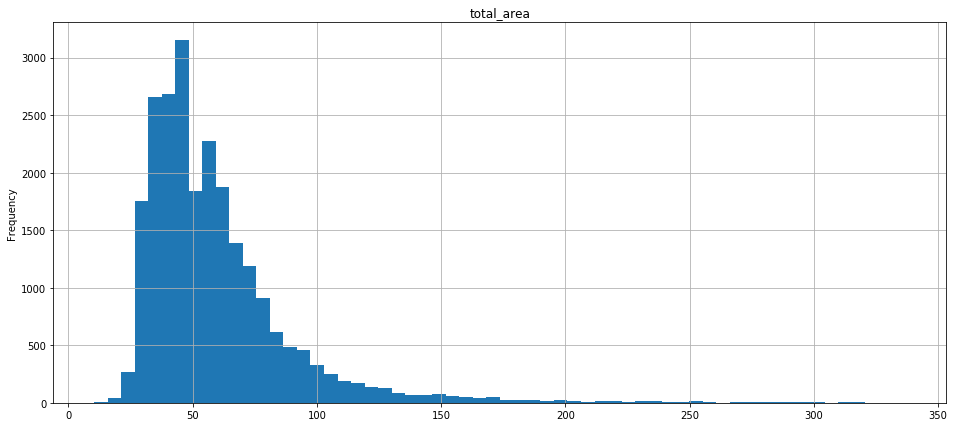

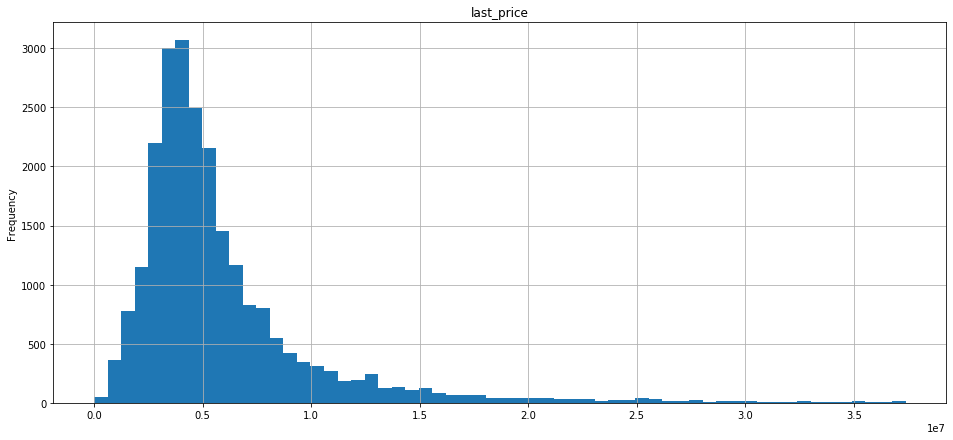

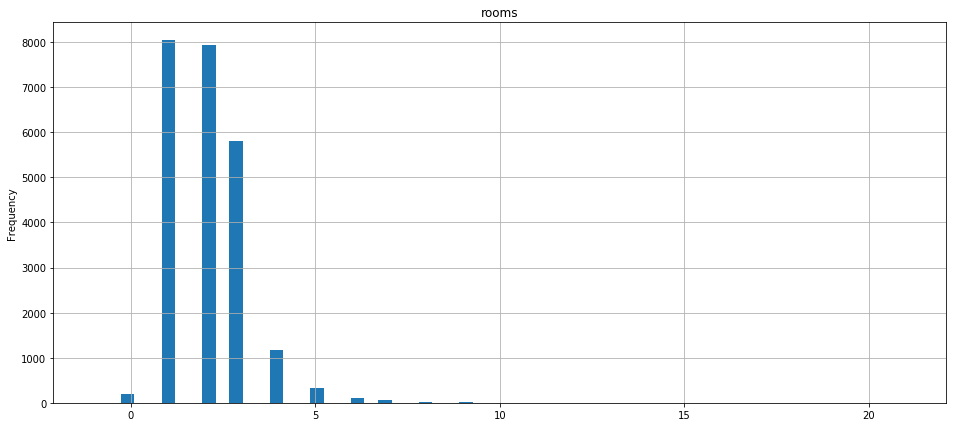

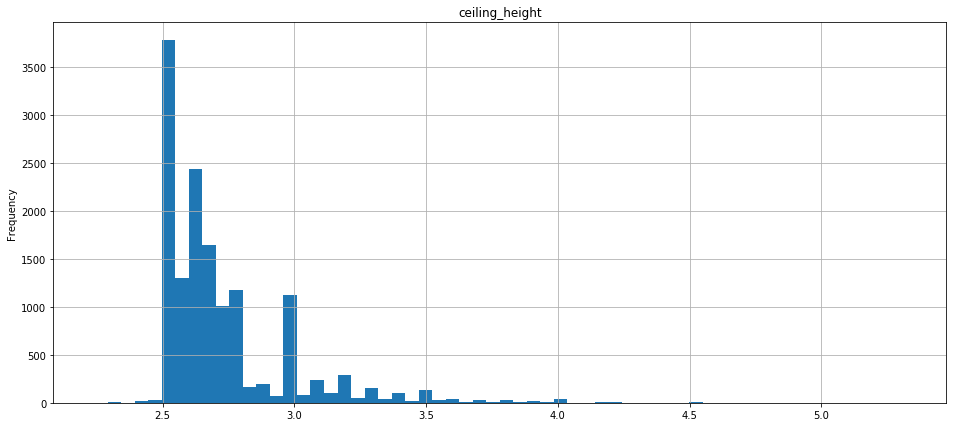

In [84]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    left_limit = (
        apartment_data[column].describe()[4]
        - (1*(apartment_data[column].describe()[6] 
              - apartment_data[column].describe()[4])))
    right_limit = (
        apartment_data[column].describe()[6]
        + (9*(apartment_data[column].describe()[6]
              - apartment_data[column].describe()[4])))
    
    (apartment_data[column]
     .sort_values()
     .plot(y= column, kind='hist', bins=60, range=(left_limit,right_limit), title=column, grid=True, figsize=(16,7)))
    plt.show()

<b>total_area</b> Типичный Пуасон с явными выбросами после 150.

<b>last_price</b> Здесь на графике присутствуют не все значения, но можно точно сказать, что цены бы 15 м. р. будут выбросами.

<b>rooms</b> Максимальное число комнат в таблице - 19, однако на фоне остальных данных его, как и другие одиночные значения, не видно. Вероятно, это были опечатки или необычные жилые помещения.

<b>ceiling_height</b> Здесь присутсвует три ярковыраженных пика: 2.5, 2.7 и 3. Это самые распространенные высоты потолков. Также, на графике не видно таких значений, как 20,100 и т.д., так как они очень редки. Логично предположить, что люди опечатались или продают ангар. Их можно считать выбросами. (хотя 100 метров для потолка, то слишком круто) 

Изучим время продажи квартиры.

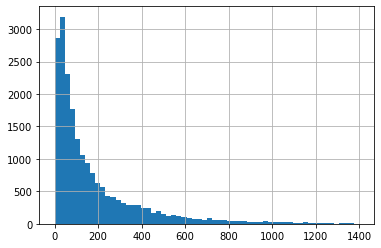

In [85]:
apartment_data['days_exposition'].hist(bins=60, range=(0,1400))

Вероятно данные, находящиеся после 800, это не покупки, а просто снятие объявления. Кто будет покупать квартиру, которая лежит на сайте 2 года? Возможно продавец просто забывал удалить объявление. (не силен в недвижимости, но я б не купил)

Теперь расчитаем среднее и медиану.

In [86]:
apartment_data['days_exposition'].describe()[[1,5]]

mean    180.7532
50%      95.0000
Name: days_exposition, dtype: float64

Среднее в два раза больше медианы. Визуально, глядя на гистограмму, медиана ближе к истине.

Можно сказать, что продажа, в среднем, занимает 95 дней. Также, квартиры купленные меньше чем за 60 дней, можно сказать продались мгновенно, а после 95 - квартиры сильно теряют в спросе. Я считаю, что квартира продвалась долго, если была снята после 500 дней.
___
Ранее мы предположили, глядя на графики, какие значение у нас будут выбросами. Проверим наши гипотезы.
___
Для поиска лишних значений воспользуемся диаграммой размаха. Строится она методом <code>boxplot()</code>, а для более продвинутой работы с графиками нужно подключить библиотеку <code>matplotlib.pyplot</code>.

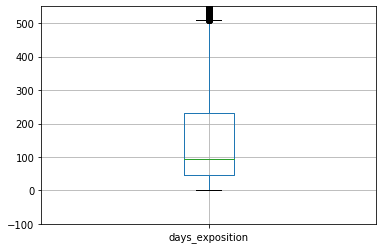

In [87]:
import matplotlib.pyplot as plt

plt.ylim(-100, 550)
apartment_data[['days_exposition']].boxplot()# boxplot() можно применить только к DataFrame

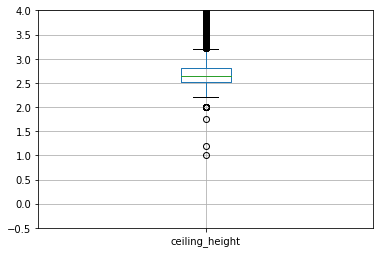

In [88]:
plt.ylim(-0.5, 4)
apartment_data[['ceiling_height']].boxplot()

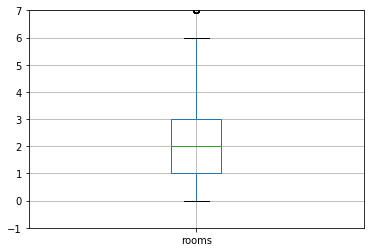

In [89]:
plt.ylim(-1, 7)
apartment_data[['rooms']].boxplot()

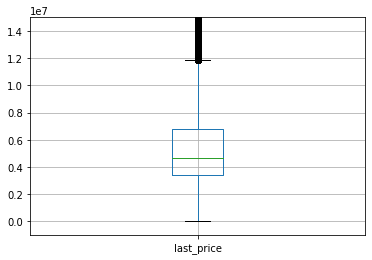

In [90]:
plt.ylim(-1000000, 15000000)
apartment_data[['last_price']].boxplot()

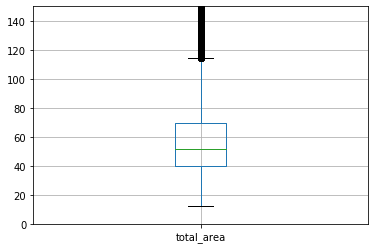

In [91]:
plt.ylim(0, 150)
apartment_data[['total_area']].boxplot()

Исследования показали, что в таблице присутсвуют выбросы и редкие значения. Границы данных, не являющихся выбросом, обозначены "усами", которые определяются 1.5 межквартильными размахами. 

Создадим новую таблицу где квартиры, продавались меньше 520 дней, высота потолка от 2.2 м до 3.3 м, количество комнат не больше 6 (выкинем те, где 0 комнат как ошибочные), цена меньше 12 миллионов, а площадь меньше 120 м^2.

In [92]:
good_data = (
    apartment_data
    .query('days_exposition < 520 and ceiling_height > 2.2 and ceiling_height <= 3.3 and rooms > 0 and rooms < 6 and last_price < 12000000 and total_area < 120')
    .reset_index(drop=True) #создаем новые индексы
    .rename(columns={'index':'old_index'})
    .copy())

good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 30 columns):
total_images               9827 non-null int64
last_price                 9827 non-null int64
total_area                 9827 non-null float64
first_day_exposition       9827 non-null datetime64[ns]
rooms                      9827 non-null int64
ceiling_height             9827 non-null float64
floors_total               9824 non-null float64
living_area                9827 non-null float64
floor                      9827 non-null int64
is_apartment               9827 non-null bool
is_studio                  9827 non-null bool
is_open_plan               9827 non-null bool
kitchen_area               9827 non-null float64
balcony                    9827 non-null int64
locality_name              9827 non-null object
airports_nearest           7717 non-null float64
city_centers_nearest       7727 non-null float64
parks_around_3_km          9827 non-null int64
parks_nearest             

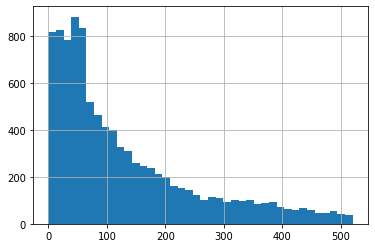

In [93]:
good_data['days_exposition'].hist(bins=40, range=(0,520))

Мы получили выборку данных, которые могут нам показать картину на рынке недвижимости. И никаких стометровых потолков.

Теперь можно приступать к ответу на вопросы. И первый вопрос: какие факторы больше всего влияют на стоимость квартиры?

Зависит ли цена от квадратного метра?

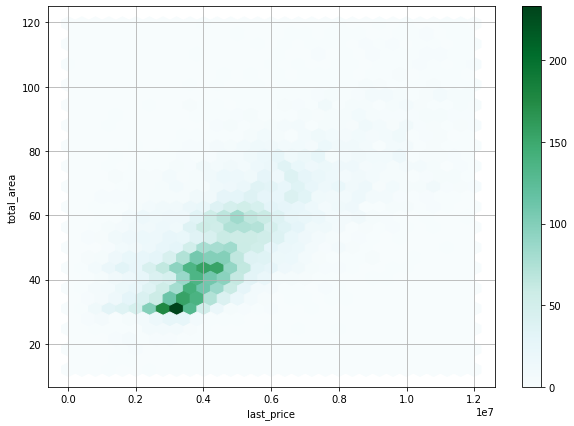

In [94]:
good_data.plot(x ='last_price', y ='total_area', kind='hexbin', gridsize=30, figsize=(10,7), sharex=False, grid=True)

In [95]:
good_data['last_price'].corr(good_data['total_area'])

0.7037074290882777

Cамая большая плотность в диапазоне цен от 3 до 4.2 миллионов рублей и площади от 32 до 48 квадратных метров. Также видно, что цена зависит от площади квартиры. (довольно очевидно, ИМХО)

Зависит ли цена от числа комнат?

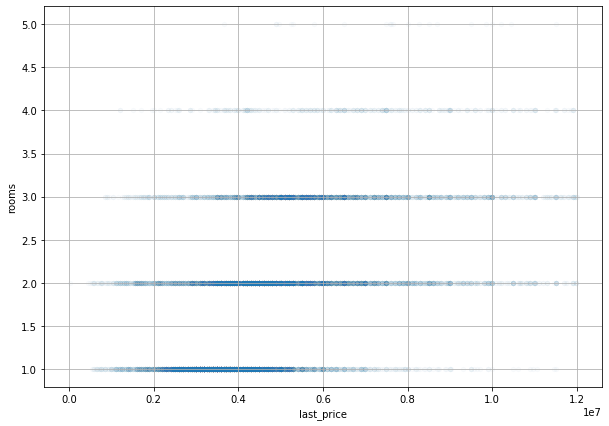

In [96]:
good_data.plot(x ='last_price', y ='rooms', kind='scatter', figsize=(10,7), sharex=False, grid=True, alpha=0.02)

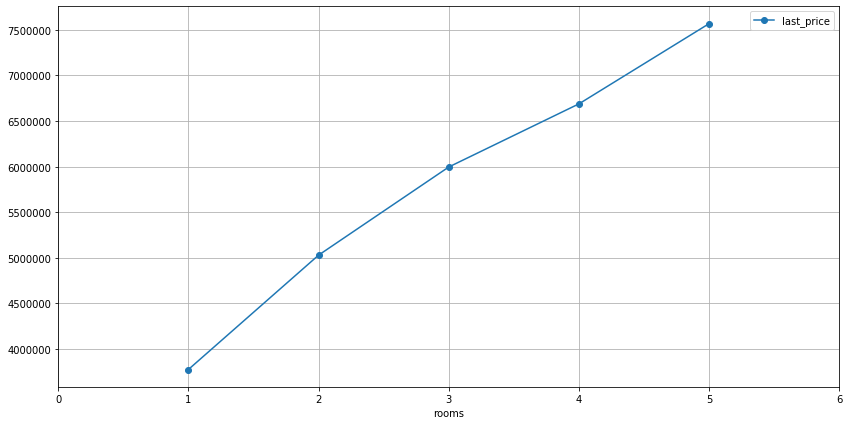

In [97]:
(good_data
 .pivot_table(index='rooms', values='last_price')
 .plot(kind='line',style='o-', grid=True, figsize=(14,7), xlim=(0,6)))

In [98]:
good_data['last_price'].corr(good_data['rooms'])

0.4418503530691664

Тут достаточно явная зависимость. Больше комнат - выше цена. Самыми популярными на рынке являются однушки за 3-4.5 миллиона рублей. Однако за те же деньги можно взять двушку и их на рынке не сильно меньше. 

Вероятно, есть закономерность, что чем больше комнат, тем больше площадь, но есть и просто квартиры "без отделки", где комнаты еще не размечены, и, вероятно, они и попадают в раздел с однокомнатными квартирами и находятся на границе диапазона.

Зависит ли цена от  удалённости от центра?

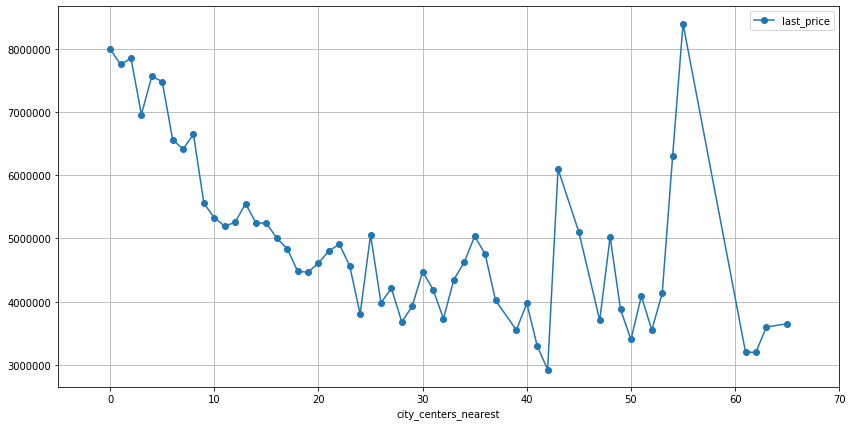

In [99]:
#я специально оставил, пусть полежит пока тут
#good_data.plot(x ='last_price', y ='city_centers_nearest', kind='scatter', figsize=(10,7), sharex=False, grid=True, alpha=0.1)

(good_data
 .pivot_table(index=(good_data['city_centers_nearest']/1000).round(), values='last_price')
 .plot(kind='line',style='o-', grid=True, figsize=(14,7), xlim=(-5,70)))

In [100]:
good_data['last_price'].corr(good_data['city_centers_nearest'])

-0.3248547262918596

Тут зависимость  очень явная. Сильно падает цена на квартиру, когда мы приближаемся к центру на 20 км. А затем, можно сказать, удаленность почти не имеет влияния.

зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

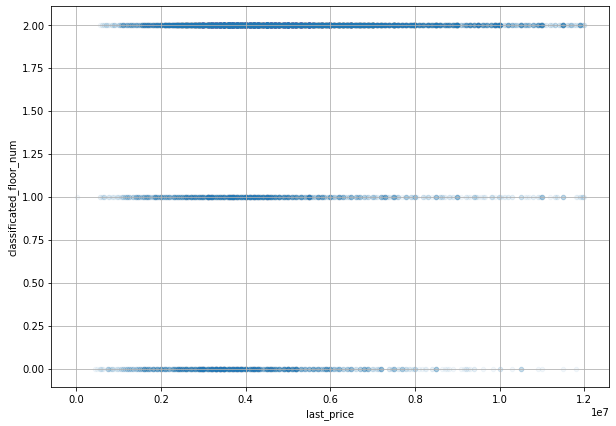

In [101]:
(good_data
 .plot(x='last_price' ,y='classificated_floor_num' ,kind='scatter',figsize=(10,7),grid=True, sharex=False, alpha=0.05))

Здесь hexbin не дает того результата, так как категория "другой" является доменирующей. Однако можно сказать, что высокие цены на первый и последний этаж встречаются редко. Значит цены на квартиры на этих этажах ниже.

Посмотрим на эти данные по другому.

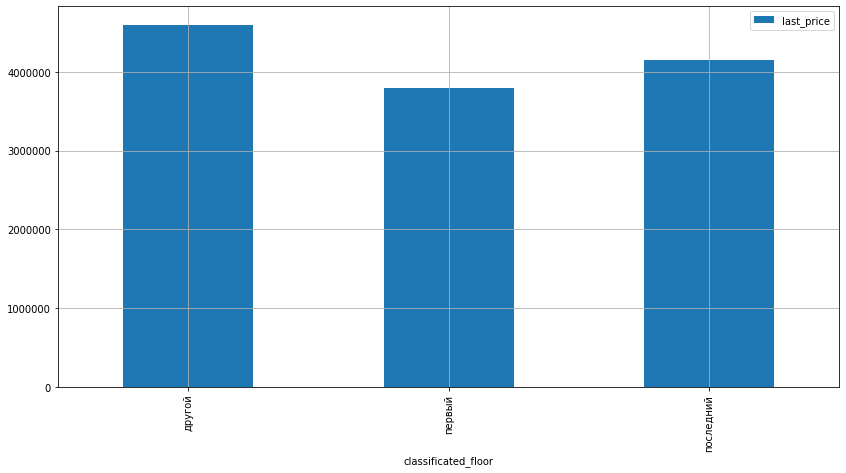

In [102]:
(good_data
 .pivot_table(index='classificated_floor', values='last_price', aggfunc='median')
 .plot(kind='bar',style='o', grid=True, figsize=(14,7)))

In [103]:
good_data['last_price'].corr(good_data['classificated_floor_num'])

0.15313929463221204

Тут уже видно, что квартиры на первом, дешевле, чем квартиры на последнем, а самыми дорогими здесь квартиры на остальных этажах

Зависимость от даты размещения: дня недели, месяца и года.

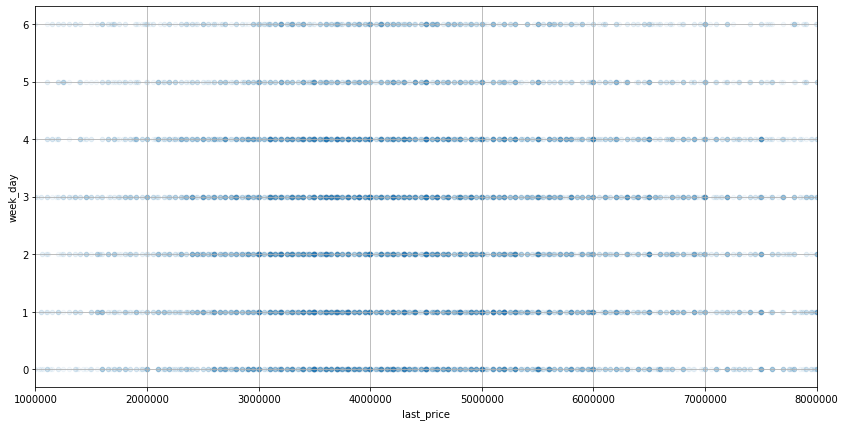

In [104]:
good_data.plot(x='last_price' ,y='week_day' ,kind='scatter',figsize=(14,7),grid=True, sharex=False, alpha=0.05, xlim=(1000000,8000000))

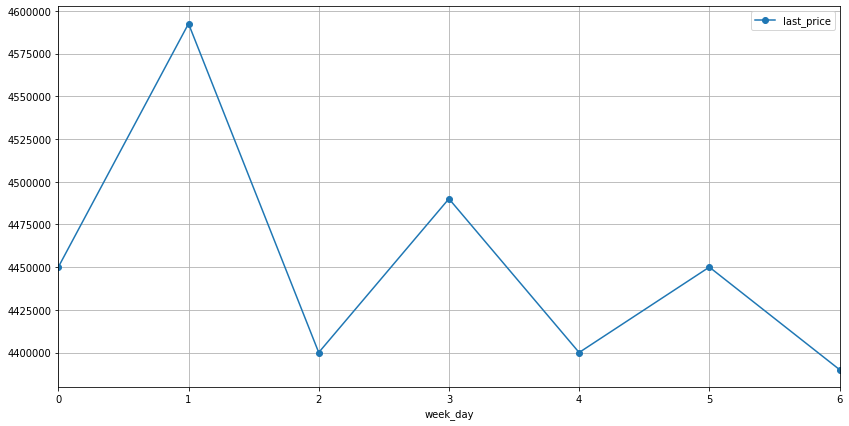

In [105]:
(good_data
.pivot_table(index='week_day', values='last_price', aggfunc='median')
.plot(kind='line',style='o-', grid=True, figsize=(14,7)))

In [106]:
good_data['last_price'].corr(good_data['week_day'])

-0.015623331742278567

Самые высокие цены на квариты во вторник, а самые низкие в воскресенье. Также люди ленятся выкладывать квартиры в выходные. Видимо, на работе много свободного времени.

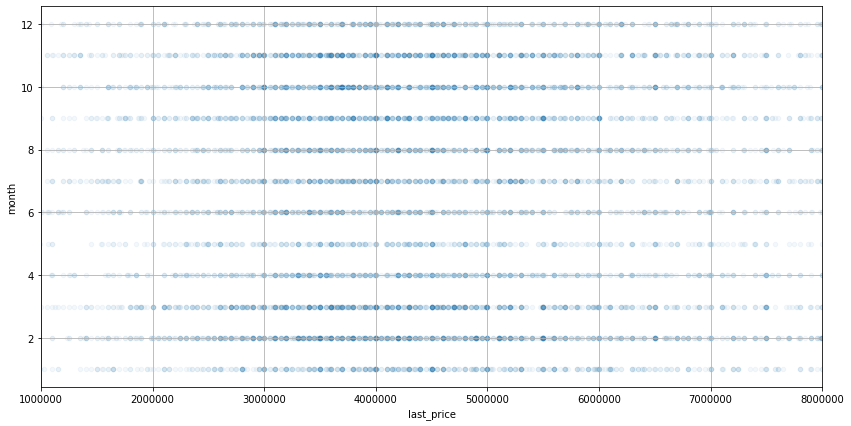

In [107]:
good_data.plot(x='last_price' ,y='month' ,kind='scatter',figsize=(14,7),grid=True, sharex=False, alpha=0.05, xlim=(1000000,8000000))

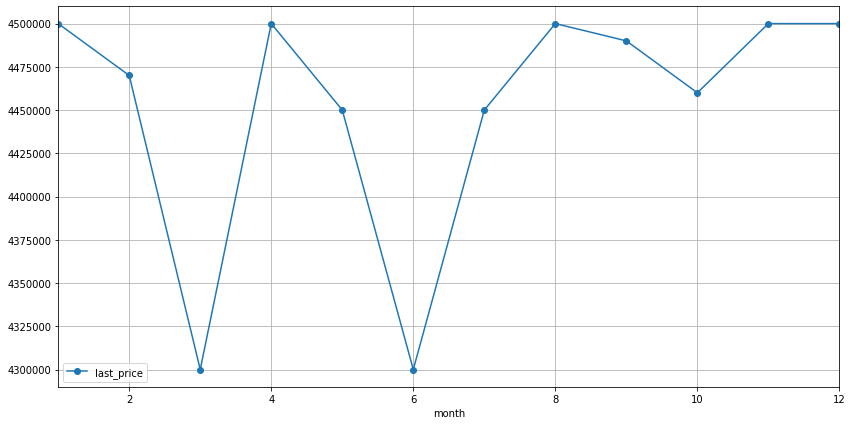

In [108]:
(good_data
 .pivot_table(index='month', values='last_price', aggfunc='median')
 .plot(kind='line',style='o-', grid=True, figsize=(14,7)))

In [109]:
good_data['last_price'].corr(good_data['month'])

0.008675694764535993

Цены самые низкие в марте и июне.В остальные месяцы ровно. И почему-то люди охотней публикуют объявления в феврале, марте, июле, сентябре и ноябре.

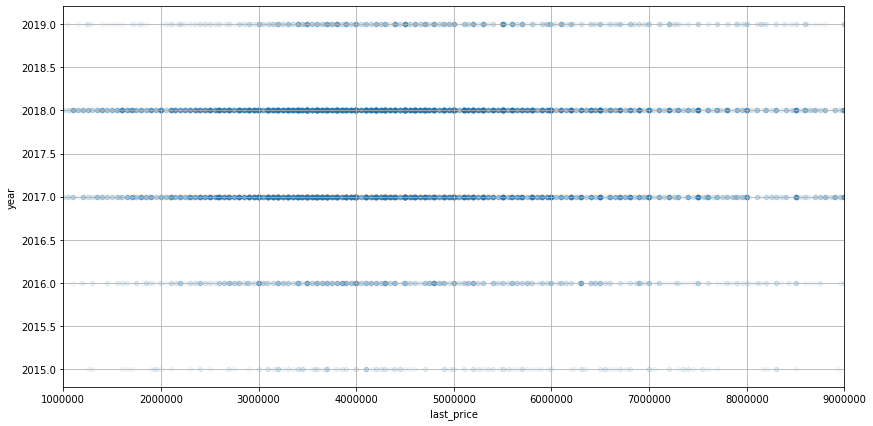

In [110]:
good_data.plot(x='last_price' ,y='year' ,kind='scatter',figsize=(14,7),grid=True, sharex=False, alpha=0.05, xlim=(1000000,9000000))

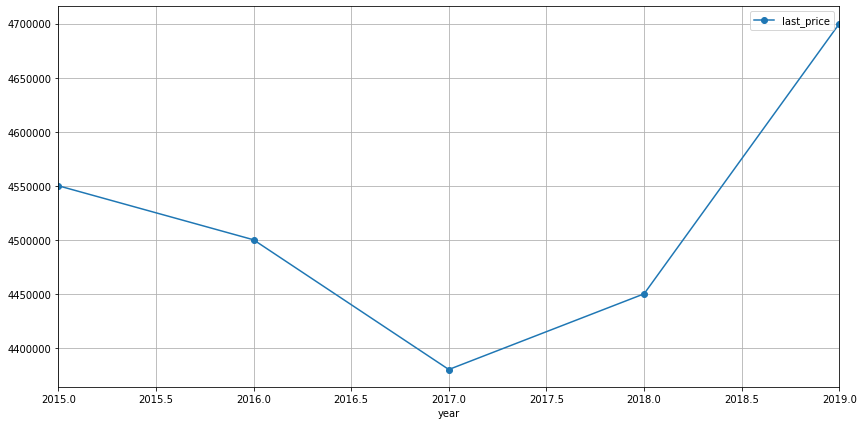

In [111]:
(good_data
 .pivot_table(index='year', values='last_price', aggfunc='median')
 .plot(kind='line',style='o-', grid=True, figsize=(14,7)))

In [112]:
good_data['last_price'].corr(good_data['year'])

0.0010010878384333417

Цена от года зависит. Цены падали к 2017 году, однако пошли вверх в 2018 и еще больше увеличились в 2019. Также пик активности продаж был в 2017-2018 годах.

Я заметил, что в новой таблице мало публикаций в 2015 году, а все публикации 2014 года исчезли. Я думаю это связанно с тем, что где-то в 2015 году был редизайн окна публикации и меньше людей стало ошибаться.

Самую большую корреляцию бесспорно имеет площадь (почти 1). Следом идет количество комнат, затем удаленности от центра и потом этаж. Остальные значения имеют меньшее влияние.

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах.

Для этого воспользуемся методом <code>pivot_table()</code> для создания сводной таблицы.

In [113]:
top_10_locality_price_per_m = (
    good_data
    .pivot_table(index='locality_name', values='price_per_m', aggfunc=('mean','count'))
    .sort_values('count', ascending=False)
    .head(10))

top_10_locality_price_per_m

count           mean
locality_name                          
Санкт-Петербург     6620  104743.072391
Всеволожск           193   66037.505048
посёлок Шушары       178   78569.386527
посёлок Мурино       177   87851.175656
Колпино              168   74648.326803
Пушкин               154   98144.810490
посёлок Парголово    115   89570.355642
Гатчина              112   70087.021962
Петергоф             107   82924.696035
деревня Кудрово      103   90826.341128

Выделим населённые пункты с самой низкой и высокой стоимостью жилья.

In [114]:
top_10_locality_price_per_m['mean'].describe()[[3,7]]

min     66037.505048
max    104743.072391
Name: mean, dtype: float64

Также можно сделать так, чтобы было более наглядно.

In [115]:
top_10_locality_price_per_m['mean'].sort_values()[[0,8,9]]

locality_name
Всеволожск          66037.505048
Пушкин              98144.810490
Санкт-Петербург    104743.072391
Name: mean, dtype: float64

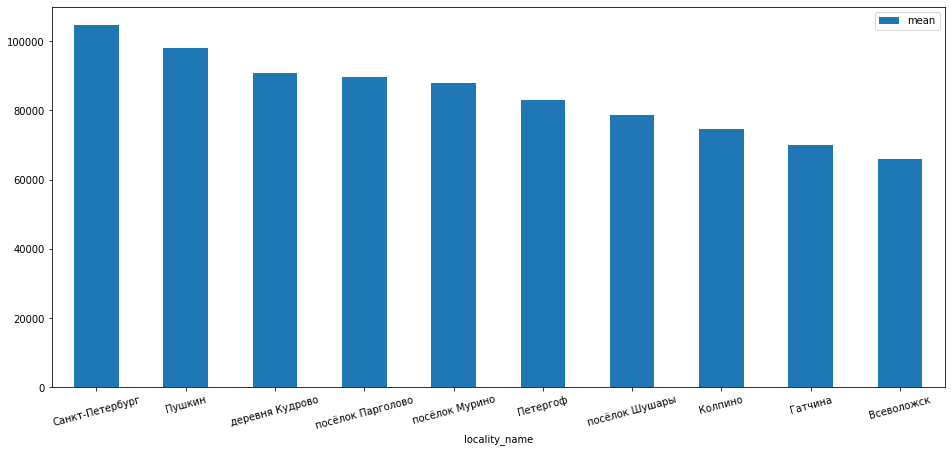

In [116]:
(top_10_locality_price_per_m[['mean']]
 .sort_values('mean', ascending=False)
 .plot(kind='bar', rot=15, figsize=(16,7)))

Самое дорогая цена за квадратный метр в Санкт-Петербурге, а самое дешевое в Всеволожске. Если рассматривать только близлежащие населенные пункты, не включая Спб, то дороже всего в Пушкине.

Изучите предложения квартир: в Санкт-Петербурге для каждой квартиры возмем информация о расстоянии до центра. Создадим таблицу с ценой за метр и расстоянием до центра.

In [117]:
spb_price_and_center = (
    good_data
    .query('locality_name == "Санкт-Петербург"')
    [[ 'price_per_m','city_centers_nearest']])

spb_price_and_center.head()

price_per_m  city_centers_nearest
0  100000.000000                8098.0
1   88524.590164               15008.0
2  127525.252525               13878.0
4   81707.317073               10698.0
5  104838.709677               10842.0

Чтобы не таскать с собой лишнего, мы взяли только те столбцы, которые нам пригодятся.

Теперь добавим столбец с растоянием до центра в километрах.

In [118]:
spb_price_and_center['city_centers_nearest_km'] = (spb_price_and_center['city_centers_nearest']/1000).round()
spb_price_and_center.head()

price_per_m  city_centers_nearest  city_centers_nearest_km
0  100000.000000                8098.0                      8.0
1   88524.590164               15008.0                     15.0
2  127525.252525               13878.0                     14.0
4   81707.317073               10698.0                     11.0
5  104838.709677               10842.0                     11.0

Посчитаем среднюю цену для каждого километра.

In [119]:
price_per_city_centers_nearest_km = (
    spb_price_and_center
    .pivot_table(index='city_centers_nearest_km', values='price_per_m', aggfunc='mean'))

price_per_city_centers_nearest_km.head()

price_per_m
city_centers_nearest_km               
0.0                       92932.098765
1.0                      117578.461616
2.0                      116292.577880
3.0                      105102.881639
4.0                      115813.404691

И наконец сам график, который показывает, как изменяется цена в зависимости от расстояния до центра. 

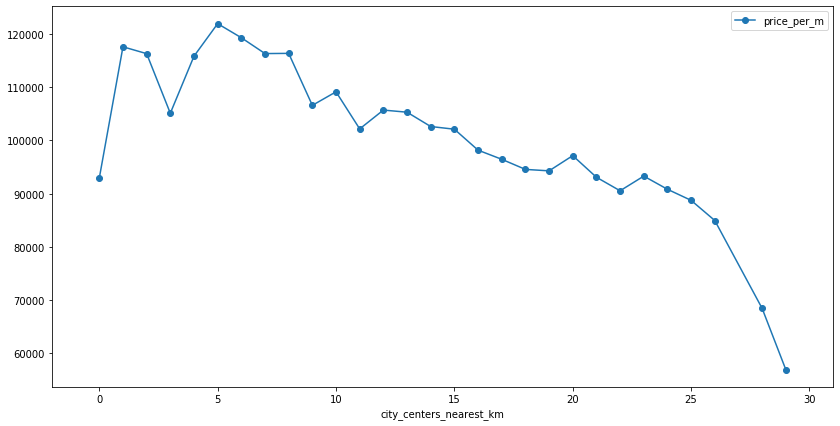

In [120]:
price_per_city_centers_nearest_km.plot( kind='line', style='o-', figsize=(14,7), xlim=(-2,31))

Можно заметить закономерность, что что с удалением от центра, цена снижается. А на расстоянии больше 7 км, стрмительно падает.

Таким образом, можно сделать вывод, что центральной зоной являются 7 км от центра.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [121]:
spb_center = spb_price_and_center.query('city_centers_nearest_km < 7')
spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 58 to 9825
Data columns (total 3 columns):
price_per_m                743 non-null float64
city_centers_nearest       743 non-null float64
city_centers_nearest_km    743 non-null float64
dtypes: float64(3)
memory usage: 23.2 KB


Теперь добавим в нашу таблицу значения, которы мы не взяли с собой в прошлом задании

In [ ]:
spb_center_full_data = spb_center.merge(good_data).drop_duplicates()

spb_center_full_data = spb_center.merge(good_data)

In [123]:
spb_center_full_data.head(10)

price_per_m  city_centers_nearest  city_centers_nearest_km  total_images  \
0   99666.666667                6262.0                      6.0             9   
1  106818.181818                4937.0                      5.0            14   
2   84285.714286                4132.0                      4.0            10   
3  149104.477612                5129.0                      5.0            12   
4  133218.430556                5384.0                      5.0             6   
5  132196.162047                6337.0                      6.0            18   
6  130289.193303                5045.0                      5.0             4   
7  117647.058824                1166.0                      1.0            15   
8  103000.000000                4986.0                      5.0             1   
9  135483.870968                4827.0                      5.0             5   

   last_price  total_area first_day_exposition  rooms  ceiling_height  \
0     2990000        30.0           2016-06-08      1            2.50   
1     7050000        66.0           2017-09-04      3            3.00   
2     5900000        70.0           2017-01-24      3            2.51   
3     9990000        67.0           2017-07-10      1            2.84   
4     9591727        72.0           2017-06-29      2            2.80   
5     6200000        46.9           2018-07-30      2            3.00   
6     8560000        65.7           2017-11-10      2            2.76   
7     6800000        57.8           2017-04-28      3            2.80   
8     5150000        50.0           2016-07-02      2            3.10   
9     6300000        46.5           2018-01-03      1            2.80   

   floors_total  ...  ponds_around_3_km  ponds_nearest  days_exposition  \
0           9.0  ...                  1          332.0             60.0   
1           4.0  ...                  1         1013.0             98.0   
2           5.0  ...                  1          118.0            480.0   
3           9.0  ...                  1          713.0             50.0   
4          10.0  ...                  1          534.0            118.0   
5           5.0  ...                  3          342.0            183.0   
6          11.0  ...                  0            NaN             11.0   
7           5.0  ...                  2           22.0            402.0   
8           4.0  ...                  2          819.0            122.0   
9           5.0  ...                  0            NaN             59.0   

   week_day  month  year  classificated_floor classificated_floor_num  \
0         2      6  2016            последний                       1   
1         0      9  2017            последний                       1   
2         1      1  2017               первый                       0   
3         0      7  2017               другой                       2   
4         3      6  2017               другой                       2   
5         0      7  2018            последний                       1   
6         4     11  2017               другой                       2   
7         4      4  2017               другой                       2   
8         5      7  2016               другой                       2   
9         2      1  2018               другой                       2   

   ratio_living_to_total  ratio_kitchen_to_total  
0               0.666667                0.186667  
1               0.572727                0.166667  
2               0.677143                0.114286  
3               0.552239                0.253731  
4               0.472222                0.236111  
5               0.603412                0.168443  
6               0.470320                0.199391  
7               0.583045                0.167820  
8               0.570000                0.170000  
9               0.645161                0.258065  

[10 rows x 31 columns]

Изучим площадь, цену, число комнат и высоту потолков.

In [124]:
spb_center_full_data[['total_area','last_price', 'price_per_m', 'rooms', 'ceiling_height']].describe().iloc[[1,3,5,7]]

total_area    last_price    price_per_m     rooms  ceiling_height
mean   64.876097  7.274315e+06  117188.247795  2.329744        2.918762
min    12.000000  1.600000e+06   17391.304348  1.000000        2.400000
50%    64.000000  7.200000e+06  110808.003120  2.000000        3.000000
max   119.600000  1.199600e+07  240000.040000  5.000000        3.300000

Ближу к центру все стандартно - средняя площадь близка к 64, средняя цена к 7.2 миллионам рублей, комнат 2, а высота потолка близка 3. Все по стандарту! 

Далее будет рассмотрен график синего цвета (данные по Спб). Рыжий график отображает данные по всему региону. Добавлен он для наглядности.

Выделим факторы, которые влияют на стоимость квартиры такие, как - число комнат, этаж, удалённость от центра, дата размещения объявления.

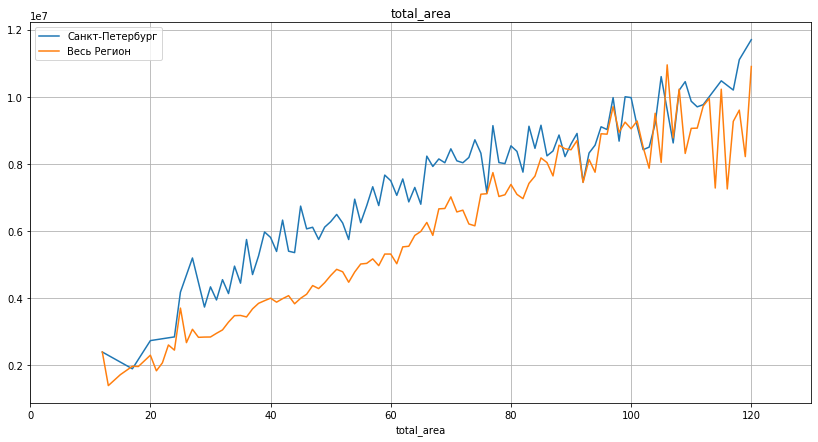

In [127]:
ax = (spb_center_full_data
 .pivot_table(index=spb_center_full_data['total_area'].round(), values='last_price')# я округлил значения столбца total_area, для более наглядной картины. Это немного выравняло график.
 .plot(kind='line', style='-', grid=True, figsize=(14,7), xlim=(0,130)))
(good_data
 .pivot_table(index=good_data['total_area'].round(), values='last_price')# я округлил значения столбца total_area, для более наглядной картины. Это немного выравняло график.
 .plot(kind='line', style='-',ax=ax, grid=True, figsize=(14,7), xlim=(0,130), title='total_area')
 .legend(['Санкт-Петербург','Весь Регион']))

На графике выше можно наблюдать как цена зависит от площади. Больше площадь - больше цена.

Изучим зависимость цены от число комнат.

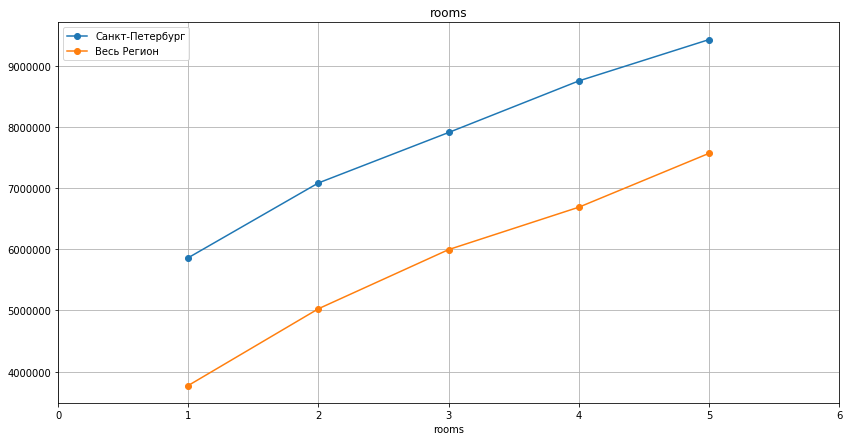

In [597]:
ax = spb_center_full_data.pivot_table(index='rooms', values='last_price').plot(kind='line',style='o-', grid=True, figsize=(14,7), xlim=(0,6))

good_data.pivot_table(index='rooms', values='last_price').plot(kind='line',style='o-', grid=True, figsize=(14,7), xlim=(0,6), ax=ax, title='rooms').legend(['Санкт-Петербург','Весь Регион'])

Число комнат прямопропорционально цене.

Рассмотрим влияния этажа на цену.

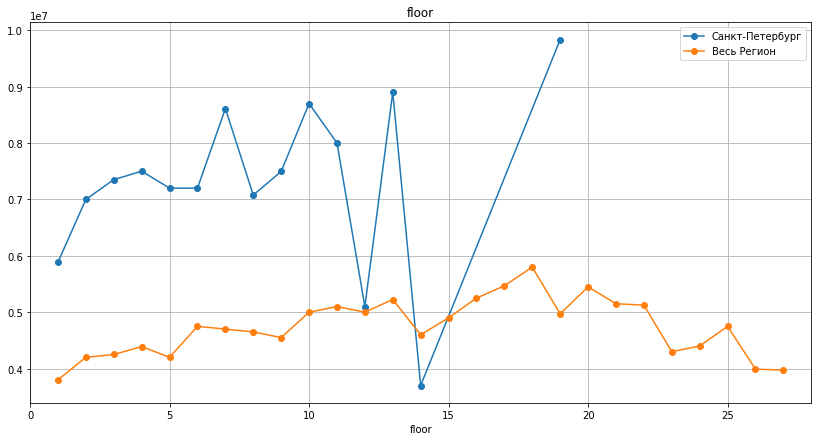

In [593]:
ax = (spb_center_full_data
 .pivot_table(index='floor', values='last_price', aggfunc='median')
 .plot(kind='line', style='-o', grid=True, figsize=(14,7), xlim=(0,28)))
(good_data
 .pivot_table(index='floor', values='last_price', aggfunc='median')
 .plot(kind='line', style='-o', grid=True, figsize=(14,7), xlim=(0,28), ax=ax, title='floor')
 .legend(['Санкт-Петербург','Весь Регион']))

На первом этаже цена самая низкая. Со 2 по 10 этаж цена выше и имеет небольшой разброс. С 11 по 13 цена еще выше, не считая некоторых значений, где наблюдается спад. Видимо это финальные этажи, а как мы уже выяснили, цены на них ниже. С 20 по 24 этаж наблюдается падение, а дальше идет стремительный рост. Видимо выше уже "вип" жилье.

Посмотрим на зависимость цены от удаленности от центра.

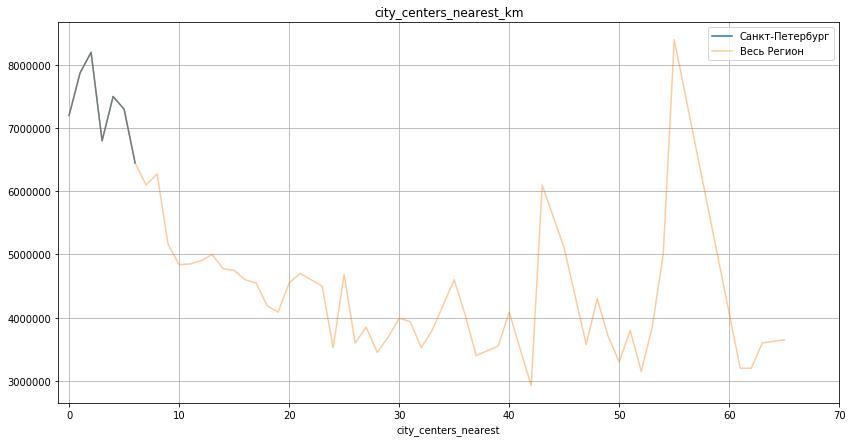

In [590]:
ax= (spb_center_full_data
 .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
 .plot(kind='line', style='-', grid=True, figsize=(14,7),xlim=(-1,25)))
(good_data
 .pivot_table(index=(good_data['city_centers_nearest']/1000).round(), values='last_price', aggfunc='median')
 .plot(kind='line', style='-', grid=True, figsize=(14,7),xlim=(-1,70),ax=ax, title='city_centers_nearest_km',alpha=0.4)
 .legend(['Санкт-Петербург','Весь Регион']))

В Питере удаленность от центра очень сильно влияет на цену жилья.

Изучим влияние даты размещения объявления.

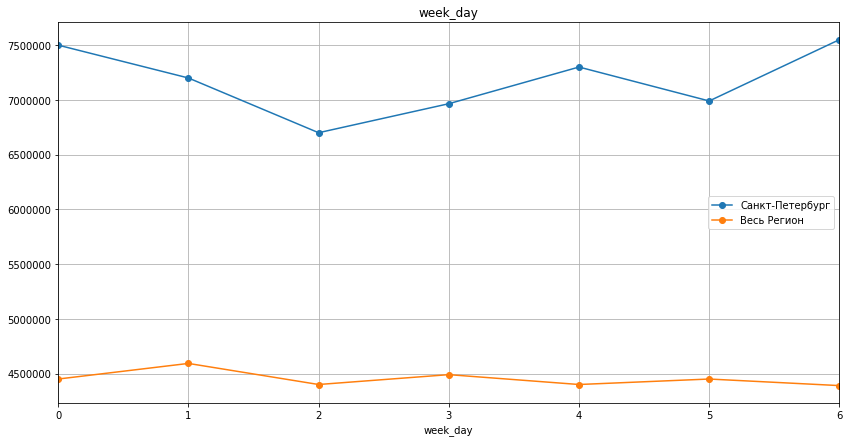

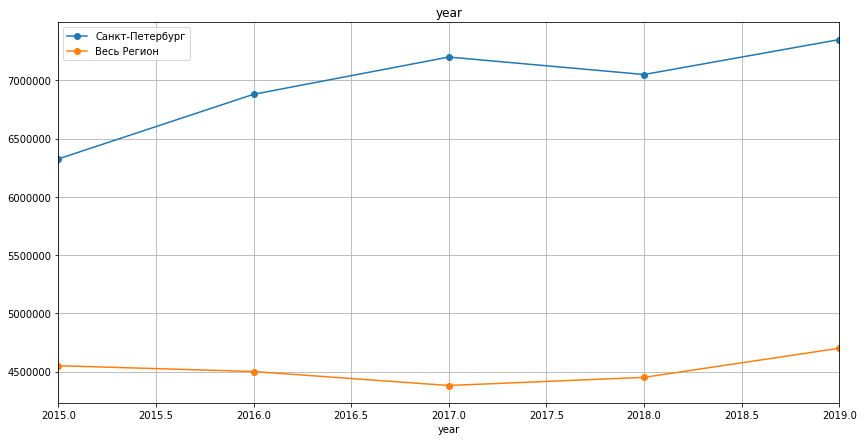

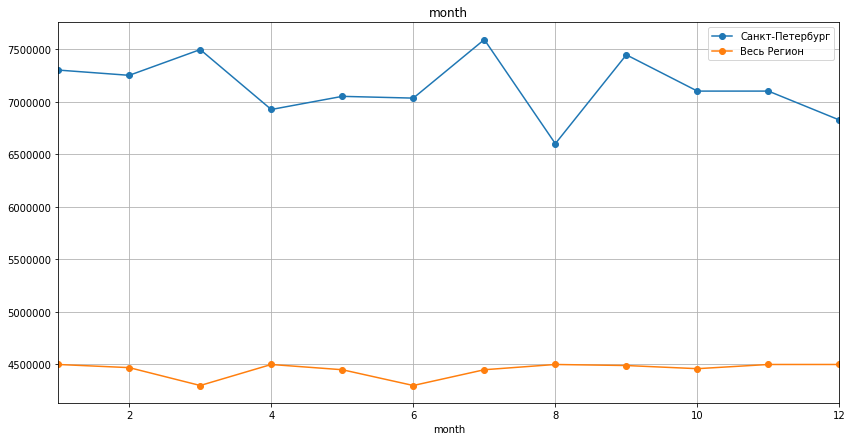

In [581]:
for value in ['week_day', 'year', 'month']:
    ax = (spb_center_full_data
    .pivot_table(index=value, values='last_price', aggfunc='median')
    .plot(kind='line',style='o-', grid=True, figsize=(14,7), title= value))
    (good_data
    .pivot_table(index=value, values='last_price', aggfunc='median')
    .plot(kind='line',style='o-', ax=ax, grid=True, figsize=(14,7))
    .legend(['Санкт-Петербург','Весь Регион']))

Можно сказать, что зависимость цены от даты в центре Спб практически такая же, как и по всему региону.

Подведем итог по 4 шагу.

### Вывод

Можно выделить основные критерии, влияющие на цену. Это общая площадь, количество комнат и удаленность от центра. Остальные значения влияют в меньшей степени, но ими тоже не стоит принебрегать.

Также, я сделал вывод, что цены в центре спб в среднем на 20-30% выше, чем по всему региону. (синий график везде находится выше)

### Шаг 5. Общий вывод

Были проведены исследования цен в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Были найдены и удалены выбросы, которые могли повлиять на расчеты. Были проверены факторы, которые влияют на стоимость квартиры. На основе исследований были найдены:
 - зависимость стоимости недвижимости от остальных факторов;
 - топ 10 городов по количеству жилья и найденна его средня стоимость в них;
 - центральная область Спб, зависимость цены в ней от остальных данных;
 - отличие цен и зависимостей Спб от всего региона.

#### Были получены следующие результаты:
 - рыночная стоимость недвижимости зависит в большинстве своем от общей площади (1), количества комнат (0.4) и удаленности от центра (0.3);
 - в меньшей степени от этажа и даты публикации;
 - cамое дорогая цена за квадратный метр в Санкт-Петербурге (104743 р.), а самое дешевое в Всеволожске (66038 р.). Если рассматривать только близлежащие населенные пункты, не включая Спб, то дороже всего в Пушкине (98145 р.);
 - центр Питербурга равен 7 км;
 - было выявленно, что цены в центре спб выше на 20-30%;  